# Exercise 11: Auto.csv Analysis

This exercise focuses on loading Auto.csv data, performing regression analysis, and detecting outliers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from pathlib import Path

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

## Load Auto.csv and prepare data

In [2]:
# Load the Auto.csv file using pathlib
data_path = Path("data/Auto.csv")

auto_data = pd.read_csv(data_path, na_values='?')
print(f"Successfully loaded {data_path}")

# Display basic information about the dataset
print(f"\nDataset shape: {auto_data.shape}")
print(f"\nColumn names: {list(auto_data.columns)}")
print(f"\nMissing values per column:")
print(auto_data.isnull().sum())
print(f"\nFirst few rows:")
auto_data.head()

Successfully loaded data/Auto.csv

Dataset shape: (397, 9)

Column names: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

First few rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
# Convert origin to category as requested
auto_data['origin'] = auto_data['origin'].astype('category')

# Display data types and basic statistics
print("Data types:")
print(auto_data.dtypes)
print("\nBasic statistics:")
auto_data.describe()

Data types:
mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

Basic statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
# Split data into training and validation sets
train_data, val_data = train_test_split(auto_data, test_size=0.3, random_state=42)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"\nTraining set shape: {train_data.shape}")
print(f"Validation set shape: {val_data.shape}")

Training set size: 277
Validation set size: 120

Training set shape: (277, 9)
Validation set shape: (120, 9)


## a) Use statsmodels for linear regression with mpg as dependent variable

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Prepare the data for regression (using training data)
# Select numerical predictors (excluding mpg which is our target)
numerical_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Handle missing values and convert to numeric
# Some datasets have '?' or other placeholders for missing values
train_clean = train_data[numerical_cols + ['mpg']].copy()

# Convert all columns to numeric, replacing non-numeric values with NaN
for col in numerical_cols + ['mpg']:
    train_clean[col] = pd.to_numeric(train_clean[col], errors='coerce')

# Drop rows with any missing values
train_clean = train_clean.dropna()

print(f"Training data after cleaning: {len(train_clean)} observations")
print(f"Removed {len(train_data) - len(train_clean)} observations due to missing values")
print(f"\nData types after conversion:")
print(train_clean.dtypes)

# Prepare X (predictors) and y (target)
X_train = train_clean[numerical_cols]
y_train = train_clean['mpg']

# Add constant term (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_ols = sm.OLS(y_train, X_train_sm).fit()

# Display comprehensive model summary
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("=" * 78)
print(model_ols.summary())

# Extract key statistics
print(f"\nKEY STATISTICS:")
print(f"R-squared: {model_ols.rsquared:.4f}")
print(f"Adjusted R-squared: {model_ols.rsquared_adj:.4f}")
print(f"F-statistic: {model_ols.fvalue:.4f}")
print(f"F-statistic p-value: {model_ols.f_pvalue:.2e}")
print(f"AIC: {model_ols.aic:.2f}")
print(f"BIC: {model_ols.bic:.2f}")

ModuleNotFoundError: No module named 'statsmodels'

## b) Create scatterplot matrix for all variables


Alternative visualization using seaborn:



Alternative visualization using seaborn:


<Figure size 1500x1200 with 0 Axes>


Alternative visualization using seaborn:


<Figure size 1500x1200 with 0 Axes>

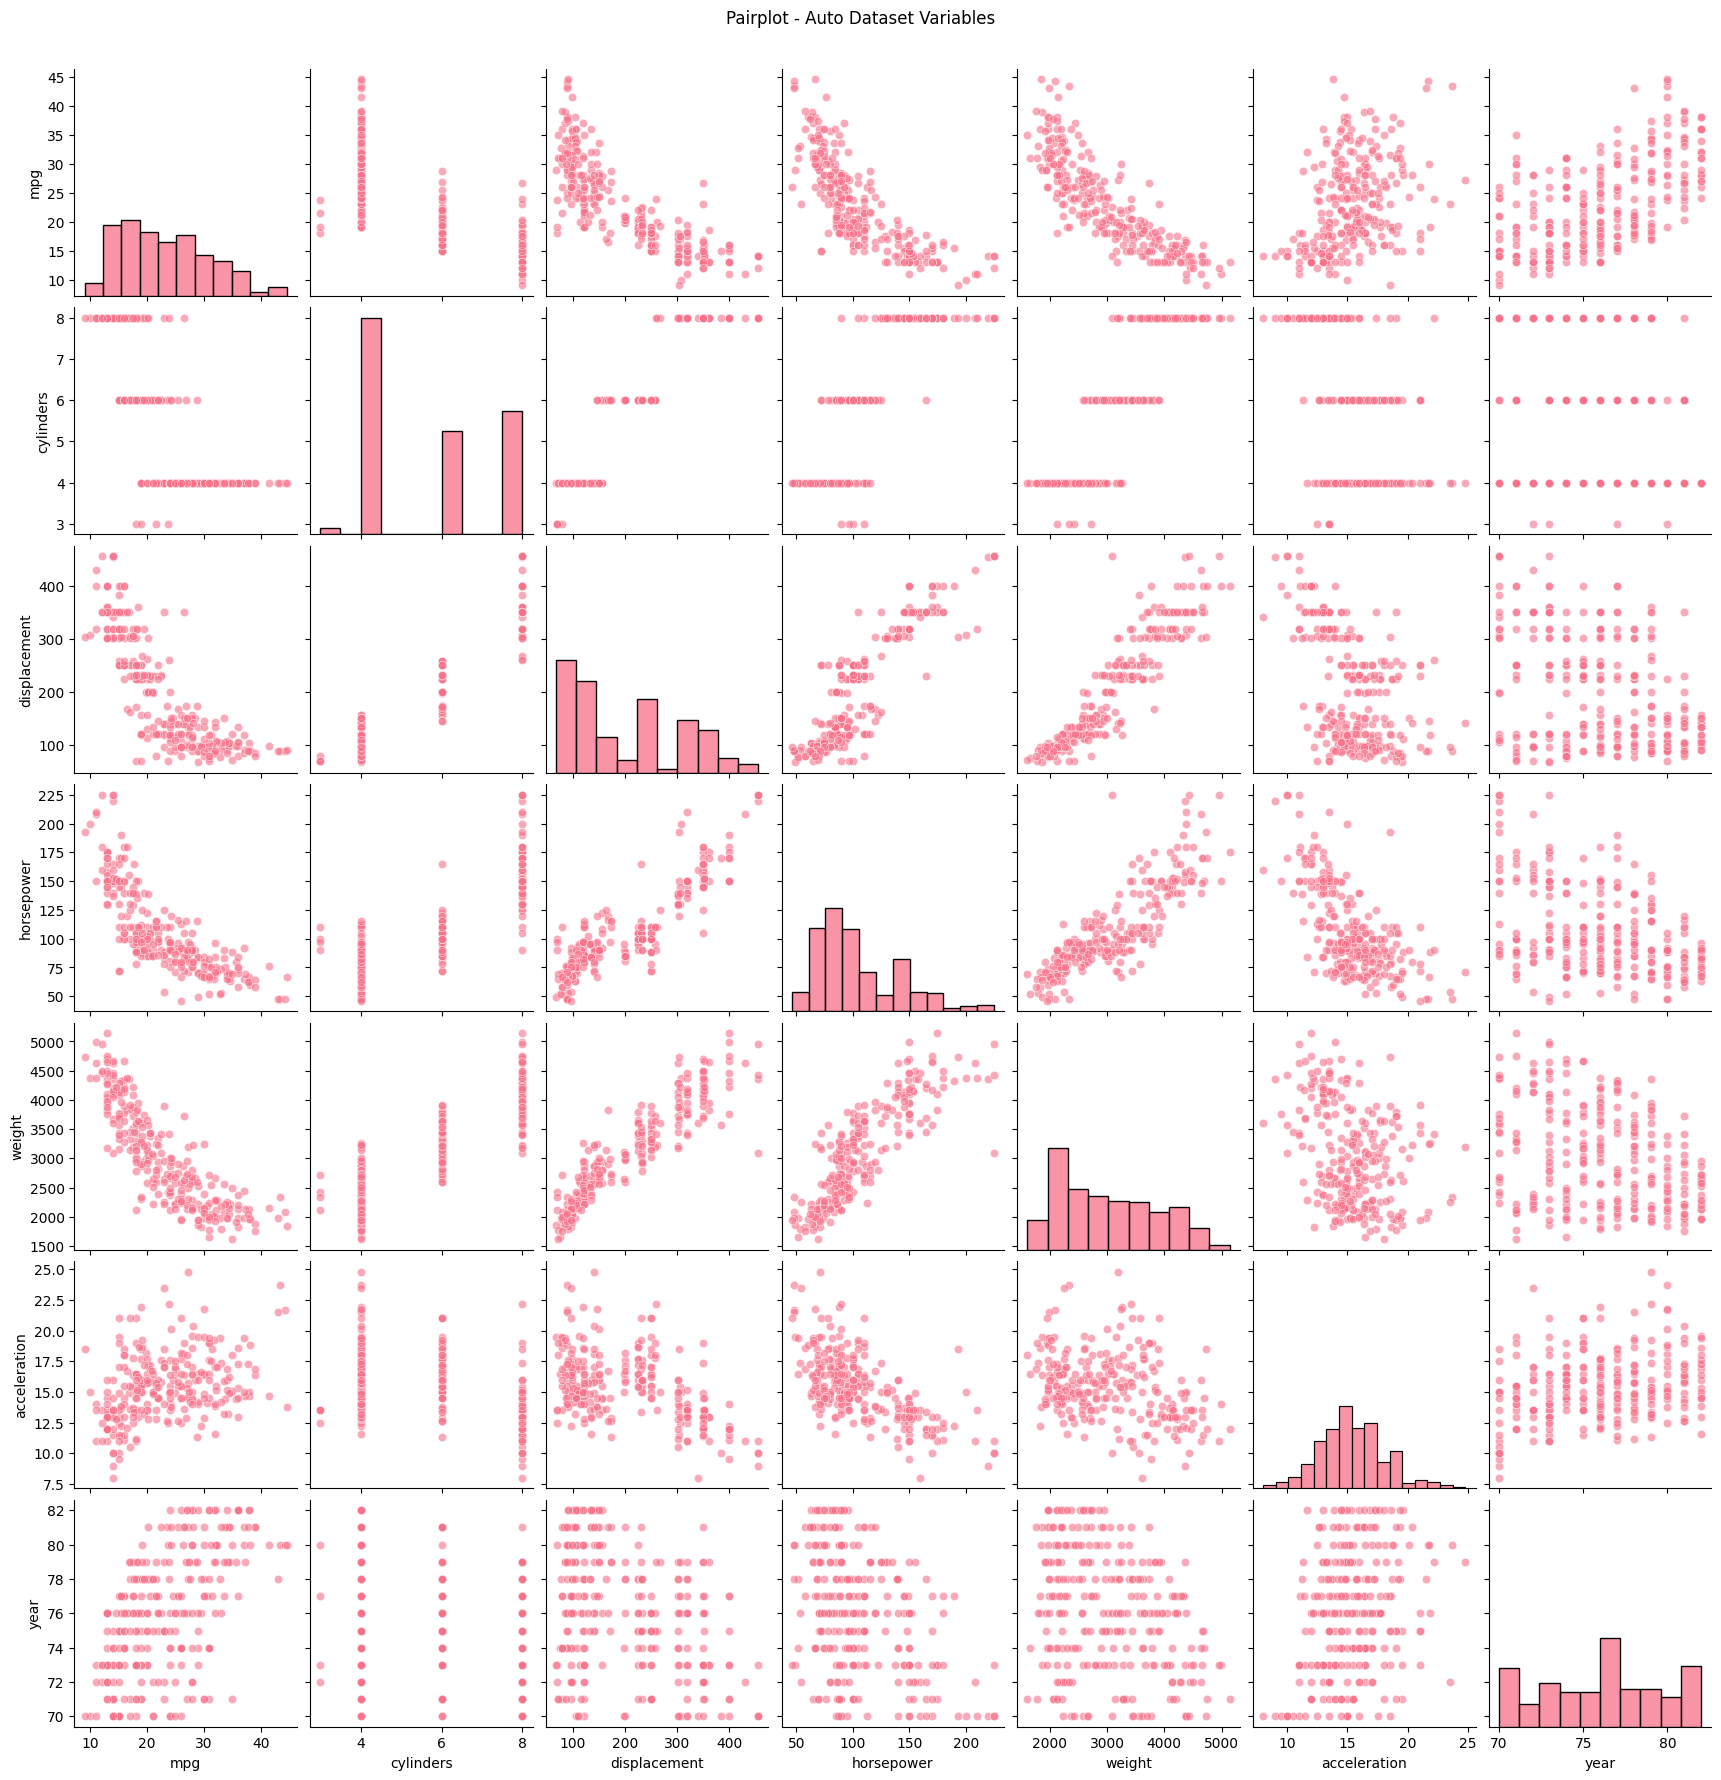

In [ ]:
# Create scatterplot matrix using pandas plotting
# Include all numerical variables
plot_vars = ['mpg'] + numerical_cols
plot_data = train_clean[plot_vars]

# Create scatterplot matrix
# fig = plt.figure(figsize=(15, 12))
# pd.plotting.scatter_matrix(plot_data, alpha=0.6, figsize=(15, 12), diagonal='hist')
# plt.suptitle('Scatterplot Matrix - Auto Dataset', size=16, y=0.95)
# plt.tight_layout()
# plt.show()

# Alternative using seaborn pairplot
print("\nAlternative visualization using seaborn:")
plt.figure(figsize=(15, 12))
sns.pairplot(plot_data, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Auto Dataset Variables', y=1.02)
plt.show()

CORRELATION MATRIX:
                mpg  cylinders  displacement  horsepower  weight  \
mpg           1.000     -0.789        -0.813      -0.784  -0.847   
cylinders    -0.789      1.000         0.953       0.841   0.893   
displacement -0.813      0.953         1.000       0.888   0.928   
horsepower   -0.784      0.841         0.888       1.000   0.855   
weight       -0.847      0.893         0.928       0.855   1.000   
acceleration  0.363     -0.448        -0.473      -0.640  -0.336   
year          0.578     -0.362        -0.377      -0.418  -0.326   

              acceleration   year  
mpg                  0.363  0.578  
cylinders           -0.448 -0.362  
displacement        -0.473 -0.377  
horsepower          -0.640 -0.418  
weight              -0.336 -0.326  
acceleration         1.000  0.266  
year                 0.266  1.000  


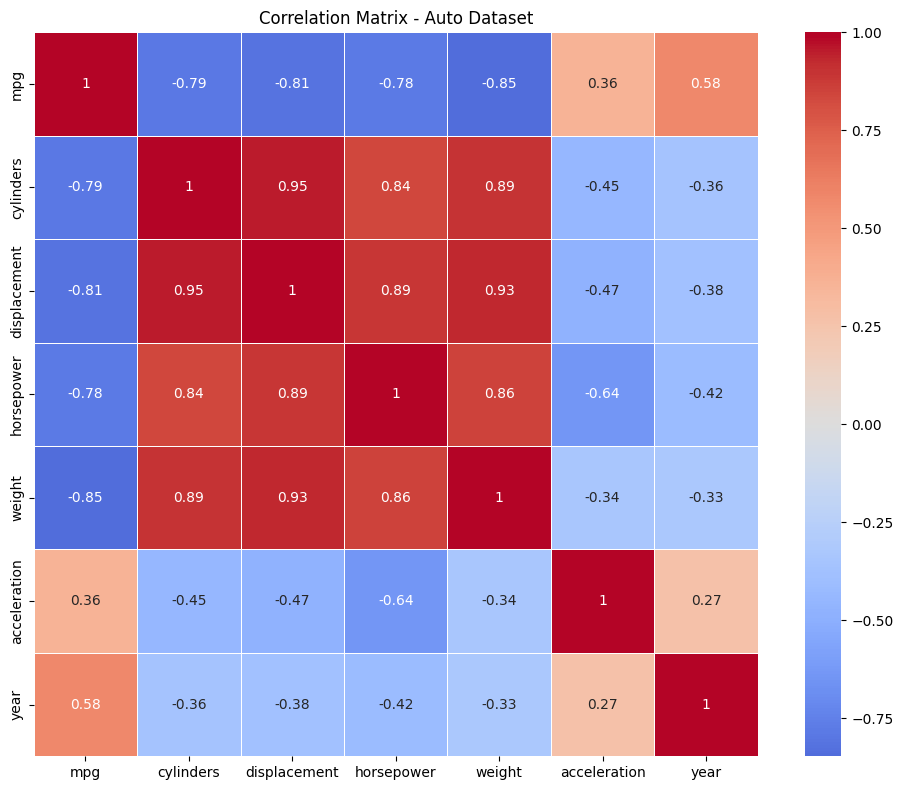


Correlations with MPG (sorted by absolute value):
weight         : -0.847
displacement   : -0.813
cylinders      : -0.789
horsepower     : -0.784
year           :  0.578
acceleration   :  0.363


In [ ]:
# Calculate and display correlation matrix
correlation_matrix = plot_data.corr()

print("CORRELATION MATRIX:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Auto Dataset')
plt.tight_layout()
plt.show()

# Identify strong correlations with mpg
mpg_correlations = correlation_matrix['mpg'].drop('mpg').sort_values(key=abs, ascending=False)
print(f"\nCorrelations with MPG (sorted by absolute value):")
for var, corr in mpg_correlations.items():
    print(f"{var:15}: {corr:6.3f}")

## c) Perform linear regression with different models using patsy

In [ ]:
import patsy
from sklearn import metrics

# Prepare validation data
val_clean = val_data[numerical_cols + ['mpg']].copy()
for col in numerical_cols + ['mpg']:
    val_clean[col] = pd.to_numeric(val_clean[col], errors='coerce')
val_clean = val_clean.dropna()

# Define helper function like in exercise3
def linearRegression(model_formula, train, valid, print_result=True):      
      
    y_train, X_train = patsy.dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = patsy.dmatrices(model_formula, data=valid, return_type='dataframe')

    model = sm.OLS(y_train, X_train) 
    result = model.fit() 

    y_train_pred = result.predict(X_train)
    y_valid_pred = result.predict(X_valid)

    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_valid, y_valid_pred)
    generalization_error = mse_test - mse_train

    if print_result: 
        print(f"Model: {model_formula}")
        print(f"MSE Train: {mse_train:.3f}")
        print(f"MSE Test: {mse_test:.3f}")
        print(f"Generalization Error: {generalization_error:.3f}")
        print()

    return result

# Define different model formulas using patsy
models = [
    'mpg ~ horsepower',
    'mpg ~ weight',
    'mpg ~ horsepower + weight',
    'mpg ~ horsepower + weight + year',
    'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year',
    
    'mpg ~ horsepower + I(horsepower**2)',
    'mpg ~ weight + I(weight**2)',
    'mpg ~ horsepower + I(horsepower**2) + weight',
    'mpg ~ weight + I(weight**2) + I(weight**3)',
    
    'mpg ~ I(np.log(weight))',
    'mpg ~ I(np.log(horsepower))',
    'mpg ~ I(np.sqrt(weight)) + year',
    'mpg ~ I(np.log(displacement + 1)) + I(np.log(horsepower + 1)) + year',
    
    'mpg ~ horsepower * weight',
    'mpg ~ horsepower * year',
    'mpg ~ weight * year',
    'mpg ~ horsepower * I(weight**2)',
    
    'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + I(horsepower**2) + I(weight**2)'
]

# Test all models and store results
results = []

for model in models:
    result = linearRegression(model, train_clean, val_clean)
    results.append(result)

Model: mpg ~ horsepower
MSE Train: 22.832
MSE Test: 26.863
Generalization Error: 4.032

Model: mpg ~ weight
MSE Train: 16.807
MSE Test: 23.059
Generalization Error: 6.252

Model: mpg ~ horsepower + weight
MSE Train: 16.001
MSE Test: 22.218
Generalization Error: 6.217

Model: mpg ~ horsepower + weight + year
MSE Train: 10.714
MSE Test: 13.994
Generalization Error: 3.281

Model: mpg ~ cylinders + displacement + horsepower + weight + acceleration + year
MSE Train: 10.657
MSE Test: 13.933
Generalization Error: 3.277

Model: mpg ~ horsepower + I(horsepower**2)
MSE Train: 17.829
MSE Test: 21.754
Generalization Error: 3.925

Model: mpg ~ weight + I(weight**2)
MSE Train: 15.099
MSE Test: 22.540
Generalization Error: 7.442

Model: mpg ~ horsepower + I(horsepower**2) + weight
MSE Train: 14.204
MSE Test: 19.615
Generalization Error: 5.411

Model: mpg ~ weight + I(weight**2) + I(weight**3)
MSE Train: 15.096
MSE Test: 22.561
Generalization Error: 7.465

Model: mpg ~ I(np.log(weight))
MSE Train: 15.

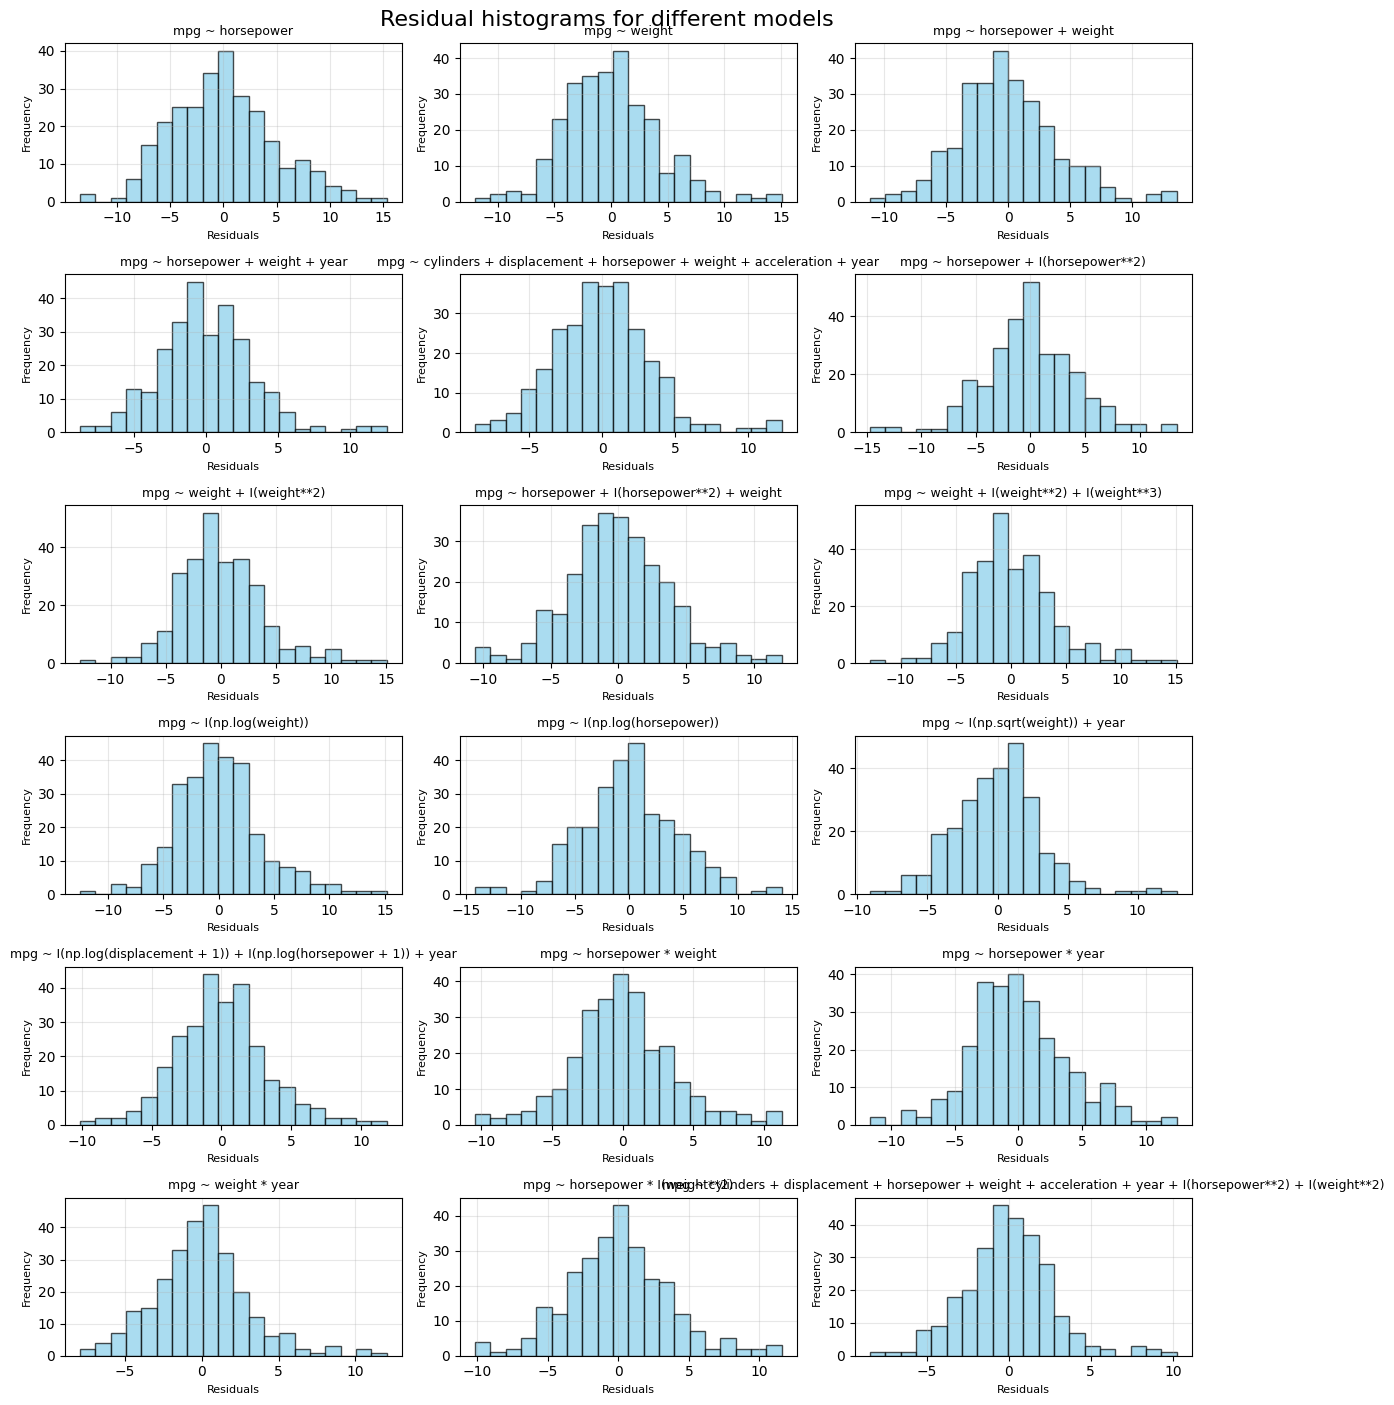

In [ ]:
# Plot residual histograms for all models
fig, axes = plt.subplots(6, 3, figsize=(12, 14))
axes = axes.flatten()

for i, formula in enumerate(models):
    ax = axes[i]
    ax.hist(results[i].resid, bins=20, color="skyblue", edgecolor="black", alpha=0.7)
    
    ax.set_xlabel("Residuals", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.set_title(formula, fontsize=9)
    ax.grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle("Residual histograms for different models", fontsize=16, y=1.0)
plt.show()

## d) Identify outliers, high leverage points, and compare models with/without outliers

In [ ]:
# Use statsmodels OLS for diagnostic analysis
# Fit model with all predictors
y_ols_train = train_clean['mpg']
X_ols_train = sm.add_constant(train_clean[numerical_cols])

model_diagnostic = sm.OLS(y_ols_train, X_ols_train).fit()

# Get diagnostics
influence = OLSInfluence(model_diagnostic)
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
standardized_residuals = influence.resid_studentized_internal

# Define thresholds
n = len(y_ols_train)
p = X_ols_train.shape[1]

leverage_threshold = 2 * p / n
high_leverage_threshold = 3 * p / n
cooks_threshold = 4 / n

# Identify problematic observations
high_leverage_mask = leverage > leverage_threshold
outlier_mask = np.abs(standardized_residuals) > 2
high_cooks_mask = cooks_distance > cooks_threshold

print(f"High leverage points (h > 2p/n = {leverage_threshold:.3f}): {np.sum(high_leverage_mask)}")
print(f"Outliers (|std residual| > 2): {np.sum(outlier_mask)}")
print(f"High Cook's distance (D > 4/n = {cooks_threshold:.3f}): {np.sum(high_cooks_mask)}")

# Identify points to remove (extreme outliers OR very high Cook's distance)
outliers_to_remove = (np.abs(standardized_residuals) > 3) | (cooks_distance > 1) | (high_leverage_mask & outlier_mask)
print(f"\nObservations to remove: {np.sum(outliers_to_remove)}")

High leverage points (h > 2p/n = 0.051): 16
Outliers (|std residual| > 2): 12
High Cook's distance (D > 4/n = 0.015): 19

Observations to remove: 5


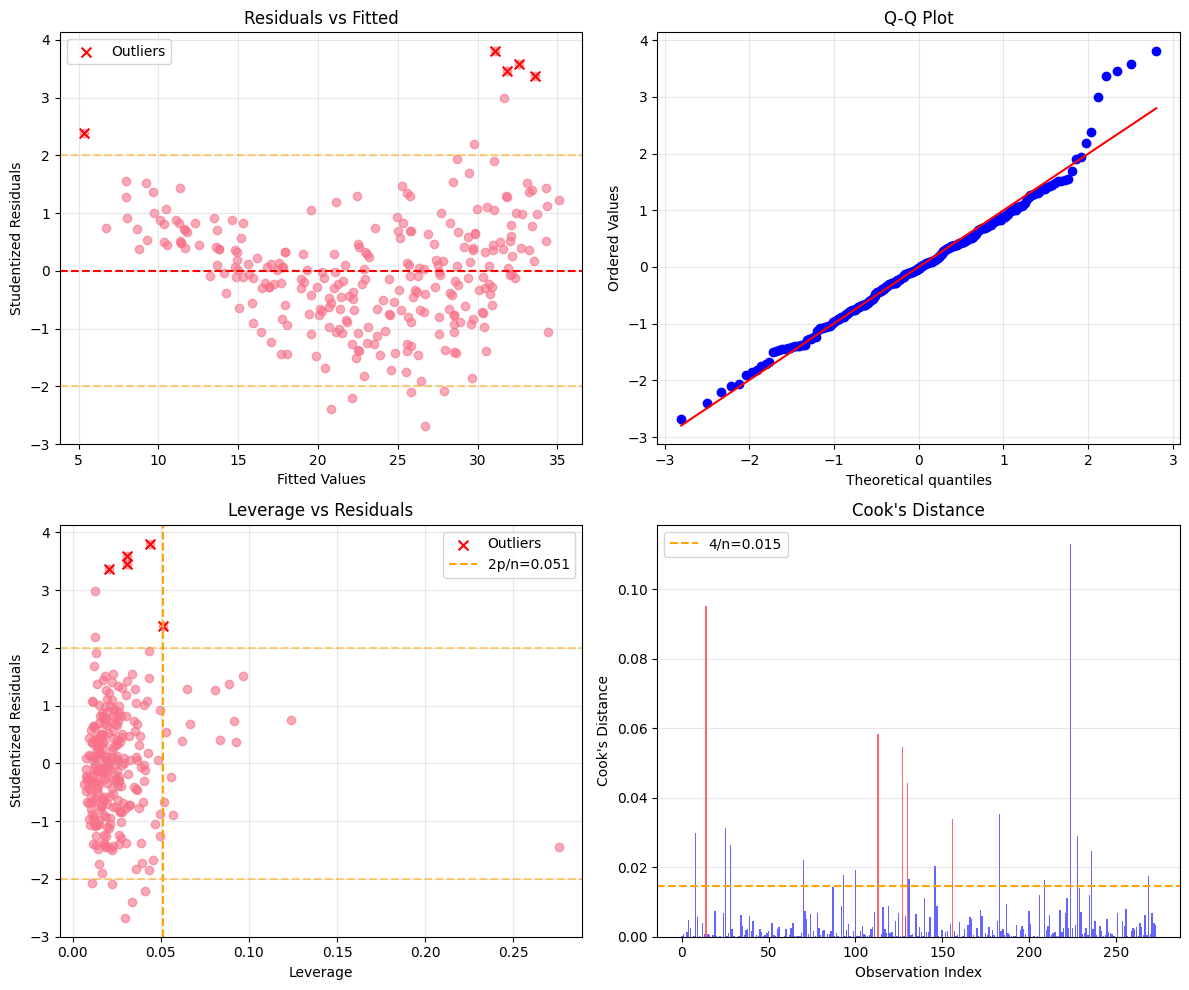

In [ ]:
# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Get fitted values and residuals
fitted_values = model_diagnostic.fittedvalues
residuals = model_diagnostic.resid

# Plot 1: Residuals vs Fitted
axes[0,0].scatter(fitted_values, standardized_residuals, alpha=0.6)
axes[0,0].scatter(fitted_values[outliers_to_remove], standardized_residuals[outliers_to_remove], 
                 c='red', s=50, marker='x', label='Outliers')
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].axhline(y=2, color='orange', linestyle='--', alpha=0.5)
axes[0,0].axhline(y=-2, color='orange', linestyle='--', alpha=0.5)
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Studentized Residuals')
axes[0,0].set_title('Residuals vs Fitted')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Q-Q Plot
stats.probplot(standardized_residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Leverage vs Residuals
axes[1,0].scatter(leverage, standardized_residuals, alpha=0.6)
axes[1,0].scatter(leverage[outliers_to_remove], standardized_residuals[outliers_to_remove],
                 c='red', s=50, marker='x', label='Outliers')
axes[1,0].axvline(x=leverage_threshold, color='orange', linestyle='--', label=f'2p/n={leverage_threshold:.3f}')
axes[1,0].axhline(y=2, color='orange', linestyle='--', alpha=0.5)
axes[1,0].axhline(y=-2, color='orange', linestyle='--', alpha=0.5)
axes[1,0].set_xlabel('Leverage')
axes[1,0].set_ylabel('Studentized Residuals')
axes[1,0].set_title('Leverage vs Residuals')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Cook's Distance
observation_indices = np.arange(len(cooks_distance))
outliers_array = outliers_to_remove.values  # Convert to numpy array for indexing
colors = ['red' if outliers_array[i] else 'blue' for i in range(len(cooks_distance))]
axes[1,1].bar(observation_indices, cooks_distance, alpha=0.6, color=colors)
axes[1,1].axhline(y=cooks_threshold, color='orange', linestyle='--', label=f'4/n={cooks_threshold:.3f}')
axes[1,1].set_xlabel('Observation Index')
axes[1,1].set_ylabel("Cook's Distance")
axes[1,1].set_title("Cook's Distance")
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers and retrain model
if np.sum(outliers_to_remove) > 0:
    print(f"\nRemoving {np.sum(outliers_to_remove)} outliers...")
    
    # Create cleaned training data
    train_clean_no_outliers = train_clean[~outliers_to_remove].copy()
    
    # Retrain model
    y_clean = train_clean_no_outliers['mpg']
    X_clean = sm.add_constant(train_clean_no_outliers[numerical_cols])
    model_clean = sm.OLS(y_clean, X_clean).fit()
    
    # Prepare validation data
    y_val = val_clean['mpg']
    X_val = sm.add_constant(val_clean[numerical_cols])
    
    # Compare models
    print(f"\nOriginal model:")
    print(f"  Training R²: {model_diagnostic.rsquared:.4f}")
    print(f"  Training RMSE: {np.sqrt(np.mean(model_diagnostic.resid**2)):.3f}")
    
    print(f"\nCleaned model (without outliers):")
    print(f"  Training R²: {model_clean.rsquared:.4f}")
    print(f"  Training RMSE: {np.sqrt(np.mean(model_clean.resid**2)):.3f}")
    
    # Validation performance
    y_val_pred_orig = model_diagnostic.predict(X_val)
    y_val_pred_clean = model_clean.predict(X_val)
    
    val_rmse_orig = np.sqrt(mean_squared_error(y_val, y_val_pred_orig))
    val_rmse_clean = np.sqrt(mean_squared_error(y_val, y_val_pred_clean))
    
    print(f"\nValidation RMSE:")
    print(f"  Original: {val_rmse_orig:.3f}")
    print(f"  Cleaned: {val_rmse_clean:.3f}")
    print(f"  Improvement: {((val_rmse_orig - val_rmse_clean)/val_rmse_orig*100):.2f}%")
else:
    print("\nNo outliers to remove.")


Removing 5 outliers...

Original model:
  Training R²: 0.8203
  Training RMSE: 3.264

Cleaned model (without outliers):
  Training R²: 0.8413
  Training RMSE: 2.915

Validation RMSE:
  Original: 3.733
  Cleaned: 3.786
  Improvement: -1.44%
